<a href="https://colab.research.google.com/github/vamshi2011/Sentiment_analysis---British_airways/blob/main/Sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from transformers import pipeline


In [ ]:
# Replace 'your_dataset.csv' with the path to your CSV file
df = pd.read_csv('/content/modified_british_airways.csv')

# Display the first few rows to verify
print(df.head())


   Unnamed: 0                                            reviews
0           0  recently traveled british airway mixed experie...
1           1  family booked leave london hong kong 2 august ...
2           2  change aa ba flight london missed connection ....
3           3  paying $ 6500 ticket family ( including pay $ ...
4           4  excellent flight ba cityflyer . plane clean , ...


In [ ]:
# Initialize the sentiment analysis pipeline
sentiment_analyzer = pipeline('sentiment-analysis')


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [ ]:
# Define a function to get sentiment
def get_sentiment(text):
    result = sentiment_analyzer(text)[0]
    return result['label'], result['score']

# Apply the function to the 'text' column
df[['sentiment_label', 'sentiment_score']] = df['reviews'].apply(
    lambda x: pd.Series(get_sentiment(x))
)

# Display the updated DataFrame
df.head()


,Unnamed: 0,reviews,sentiment_label,sentiment_score
0,0,recently traveled british airway mixed experie...,NEGATIVE,0.995691
1,1,family booked leave london hong kong 2 august ...,NEGATIVE,0.999328
2,2,change aa ba flight london missed connection ....,NEGATIVE,0.999041
3,3,paying $ 6500 ticket family ( including pay $ ...,NEGATIVE,0.997082
4,4,"excellent flight ba cityflyer . plane clean , ...",POSITIVE,0.999737


In [ ]:
df.columns

Index(['Unnamed: 0', 'reviews', 'sentiment_label', 'sentiment_score'], dtype='object')

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [ ]:
df['sentiment_label'] = df['sentiment_label'].str.replace('NEGATIVE', '0')
df['sentiment_label'] = df['sentiment_label'].str.replace('POSITIVE', '1')



In [ ]:
df = df.drop(columns = ['sentiment_score'])

In [ ]:
df.head()

,Unnamed: 0,reviews,sentiment_label
0,0,recently traveled british airway mixed experie...,0
1,1,family booked leave london hong kong 2 august ...,0
2,2,change aa ba flight london missed connection ....,0
3,3,paying $ 6500 ticket family ( including pay $ ...,0
4,4,"excellent flight ba cityflyer . plane clean , ...",1


In [ ]:
df.to_csv("/content/final_british_airways.csv")

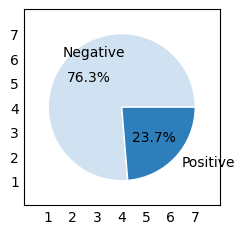

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

sentiment_counts = df['sentiment_label'].value_counts()

# Define data for the pie chart
x = sentiment_counts.values  # Count of negative and positive
labels = ['Negative', 'Positive']  # Labels for the sentiments

# Color map
colors = plt.get_cmap('Blues')(np.linspace(0.2, 0.7, len(x)))

# Plot
plt.style.use('_mpl-gallery-nogrid')
fig, ax = plt.subplots()
ax.pie(x, labels=labels, colors=colors, radius=3, center=(4, 4),
       wedgeprops={"linewidth": 1, "edgecolor": "white"}, frame=True,
       autopct='%1.1f%%')  # Displays percentage on the slices

# Set axis limits and ticks
ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
       ylim=(0, 8), yticks=np.arange(1, 8))

# Display the plot
plt.show()